# <font color='Blue'>Bike Sharing Demand</font>

## Index
1. Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature Enginerring
- Modeling
- Testing

### 1. Defining the problem statement

>Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

>The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

### 2. Collecting the data

- Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [23]:
import pandas as pd

train = pd.read_csv('train.csv', parse_dates=['datetime'])
test = pd.read_csv('test.csv')

### 3. Exploratory data analysis

In [24]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [25]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [28]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [29]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [30]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [31]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [32]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.shape

(10886, 18)

In [35]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

import seaborn as sns
sns.set()


C:\Users\mrk20\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


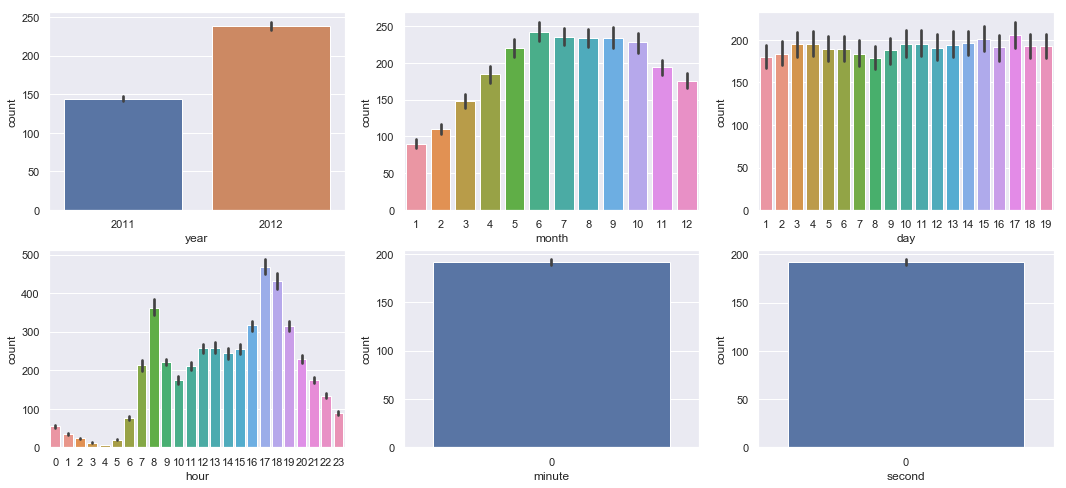

In [43]:
fig, ((axes1,axes2,axes3),(axes4, axes5, axes6)) = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches(18,8)
sns.barplot(data=train, x='year', y='count', ax=axes1)
sns.barplot(data=train, x='month', y='count', ax=axes2)
sns.barplot(data=train, x='day', y='count', ax=axes3)
sns.barplot(data=train, x='hour', y='count', ax=axes4)
sns.barplot(data=train, x='minute', y='count', ax=axes5)
sns.barplot(data=train, x='second', y='count', ax=axes6)

- 2012년도가 전년에 비해 대략 두 배가량 자전거 수요 증가
- 6월달이 가장 수요량이 높고, 7~10월도 수요량이 높은편이다. 반면 1~3월은 수요량이 적다
- 일별 데이터는 19일까지 밖에 없으므로 사용하기 어렵다.
- 출퇴근 시간대에 수요량이 높은 것으로 보여진다
- 분/초 데이터는 0으로 사용할 수 없다.

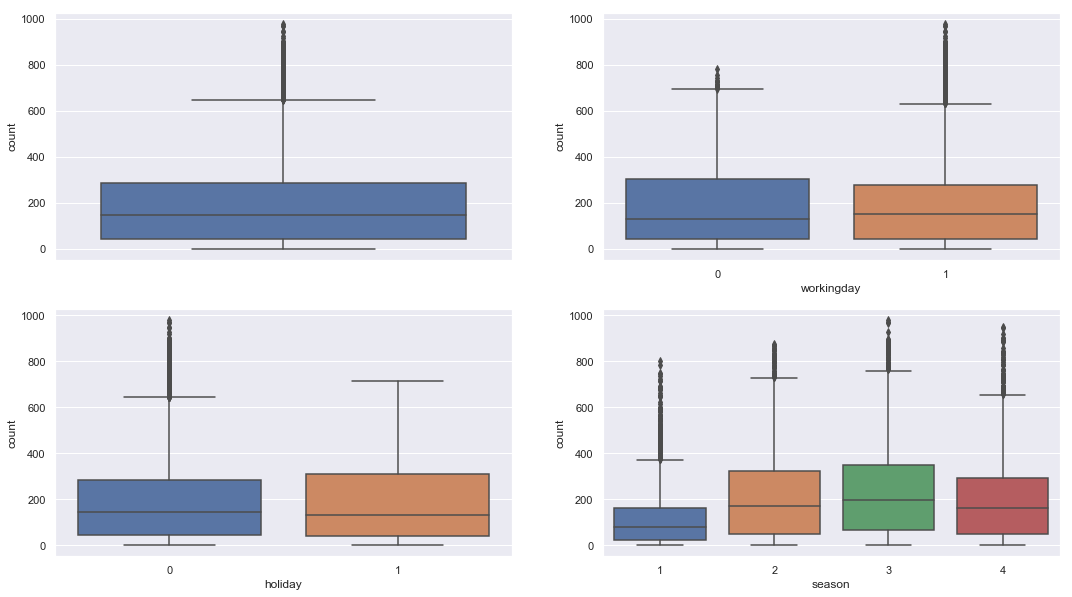

In [50]:
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(18, 10)

sns.boxplot(data=train, x='count', orient='v', ax=axes[0][0])
sns.boxplot(data=train, x='workingday', y='count', ax=axes[0][1])
sns.boxplot(data=train, x='holiday', y='count', ax=axes[1][0])
sns.boxplot(data=train, x='season', y='count', ax=axes[1][1])

In [51]:
train['dayofweek'] = train['datetime'].dt.dayofweek

C:\Users\mrk20\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


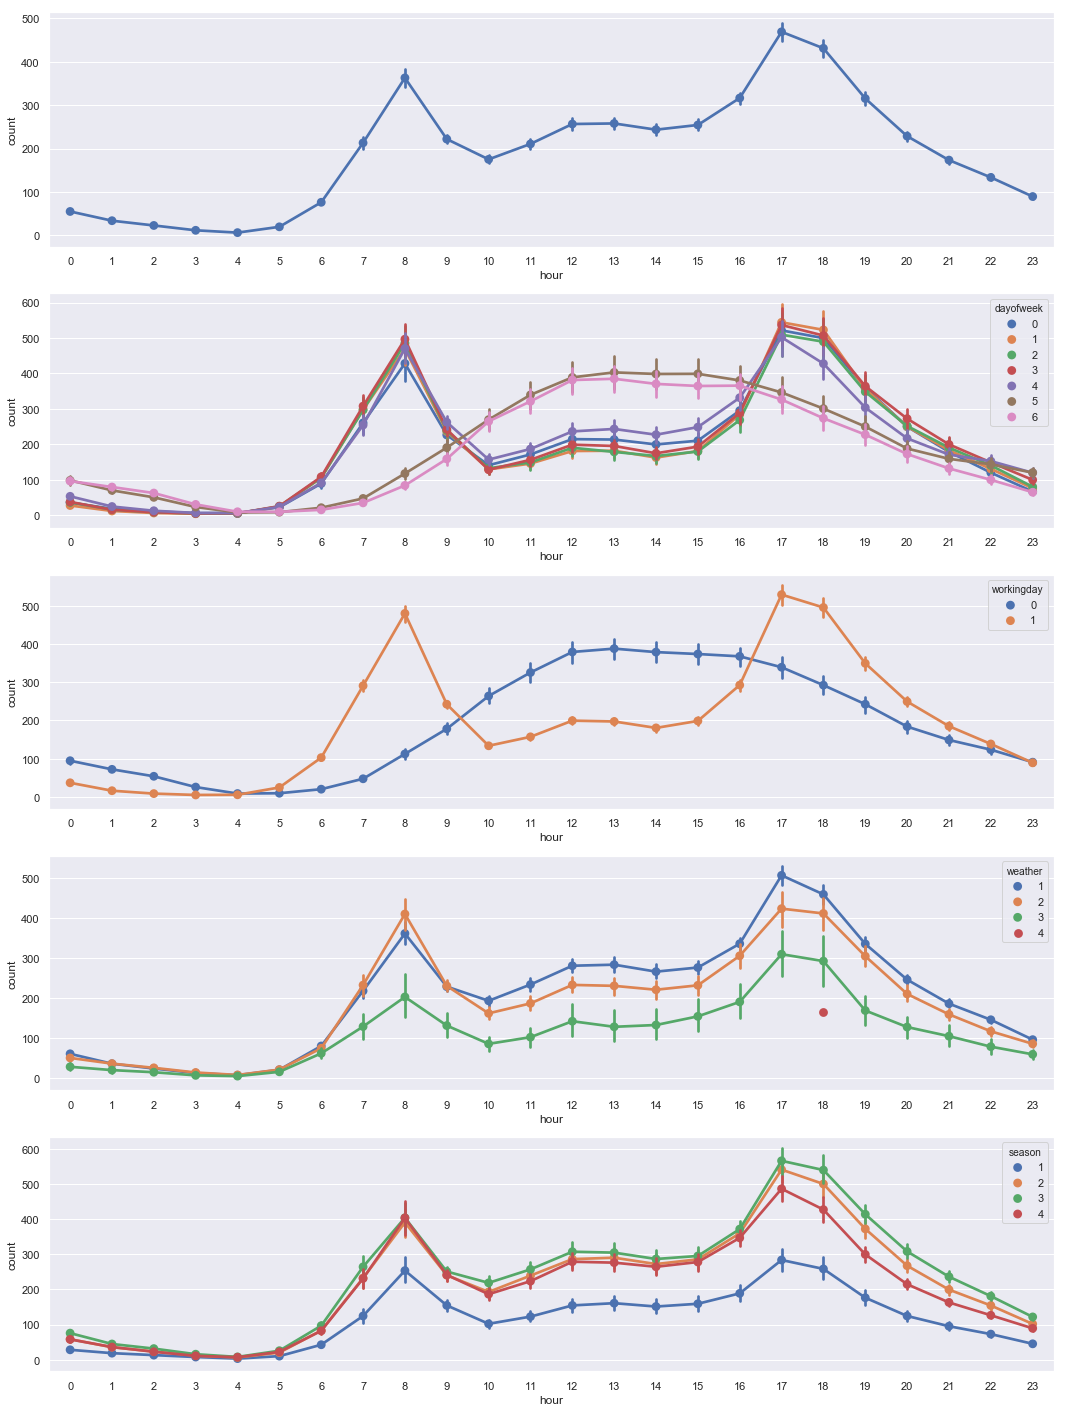

In [53]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek',ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='workingday',ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='weather',ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='season',ax=ax5)

In [55]:
import numpy as np
corrmat = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corrmat = corrmat.corr()

mask = np.array(corrmat)
mask[np.tril_indices_from(mask)] = False

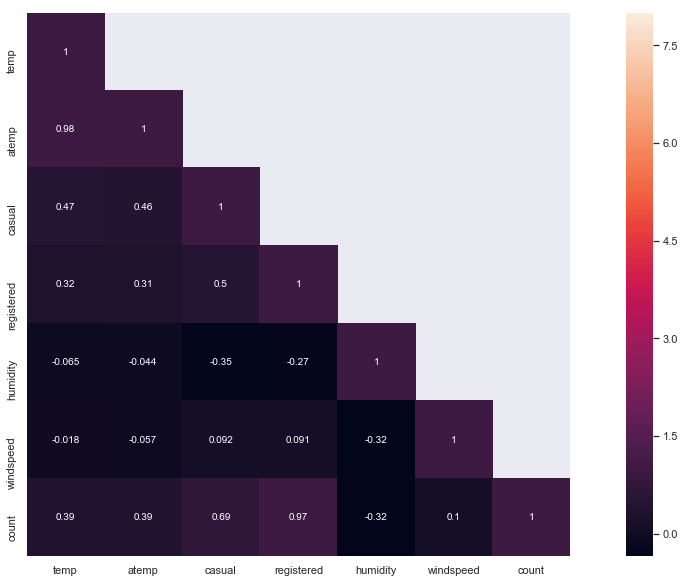

In [58]:
fig, ax = plt.subplots(ncols=1)
fig.set_size_inches(20,10)

sns.heatmap(corrmat, mask=mask, vmax=8, square=True, annot=True)

temp, atemp, humidity, windspeed는 상관성이 낮다.

C:\Users\mrk20\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


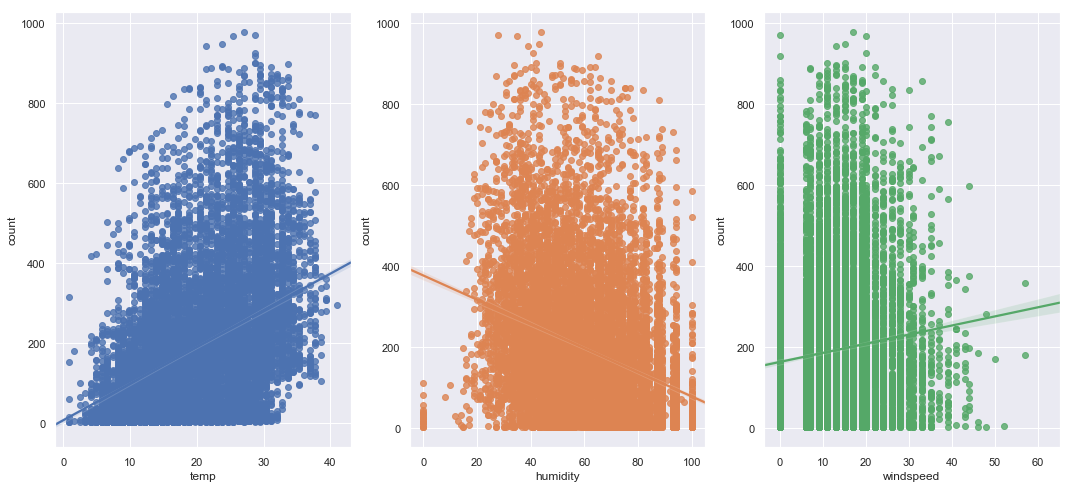

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(18,8)

sns.regplot(data=train, x='temp', y='count', ax=ax1)
sns.regplot(data=train, x='humidity', y='count', ax=ax2)
sns.regplot(data=train, x='windspeed', y='count', ax=ax3)

- 풍속의 경우 0에 숫자가 몰려있는 것으로 보인다. 아마 관측되지 않은 수치에 대해 0으로 기록된 것이 아닐까 추측해본다.

In [61]:
def concat_year_month(datetime):
    return '{0}-{1}'.format(datetime.year, datetime.month)
train['year_month'] = train['datetime'].apply(concat_year_month)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,2011-1


C:\Users\mrk20\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


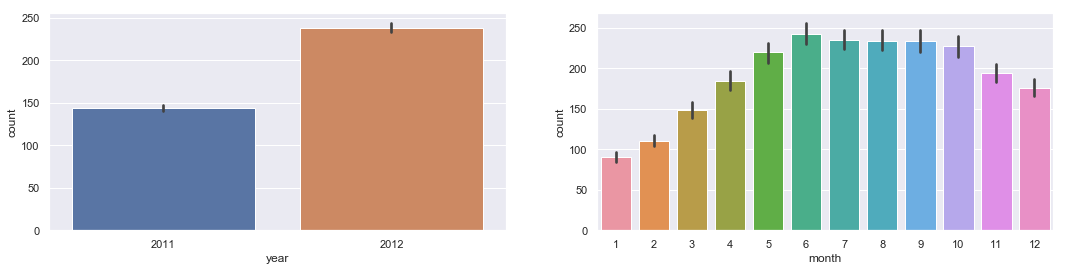

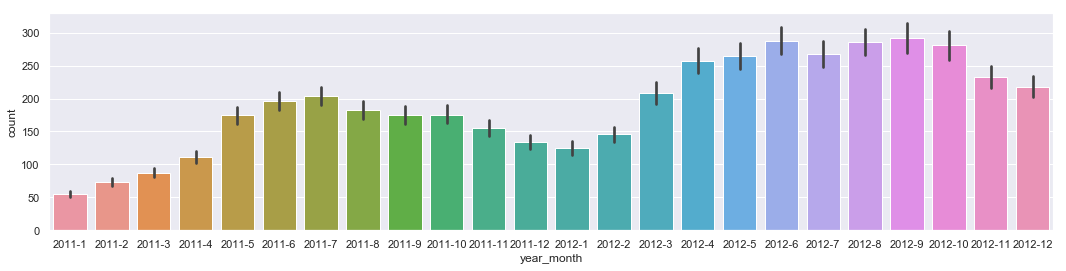

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year_month', y='count', ax=ax3)

- 2011년 보다 2012년의 대여량이 더 많다
- 겨울보다는 여름에 대여량이 더 많다
- 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다.

In [65]:
trainwithoutoutliers= train[np.abs(train['count']-train['count'].mean())<=(3*train['count'].std(
))]
trainwithoutoutliers.shape

(10739, 20)

C:\Users\mrk20\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

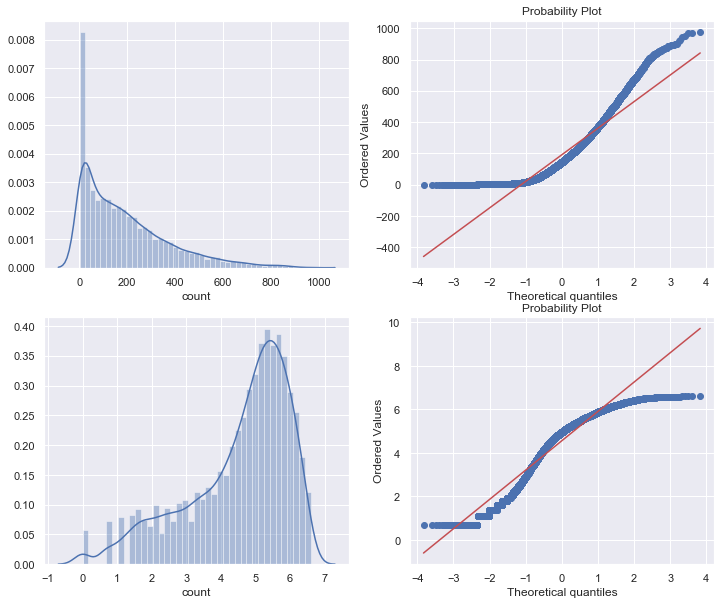

In [67]:
# count 값의 데이터 분포도를 파악
from scipy import stats
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12,10)

sns.distplot(train['count'], ax=axes[0][0])
stats.probplot(train['count'], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainwithoutoutliers['count']), ax=axes[1][0])
stats.probplot(np.log1p(trainwithoutoutliers['count']), dist='norm', fit=True, plot=axes[1][1])

count 변수가 치우져서 있다. 대부분의 기계학습은 종속변수가 normal이어야 하기에 정규분포를 갖는 것이 바람직하다. 
대안으로 outlier data를 제고하고 count변수에 log를 씌워 변경해 봐도 정규분포를 따르지는 않지만, 이전 그래프 보다 좀 더 자세하게 표현하고 있다.

### 4. Feature Engineering

In [69]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
test = pd.read_csv('test.csv', parse_dates=['datetime'])
train.shape, test.shape

((10886, 12), (6493, 9))

In [70]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 16)

In [71]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape

(6493, 13)

In [72]:
# 범주형 feature의 type을 category로 변경해준다.
categofical_feature_names = ['season', 'holiday','workingday', 'weather', 'dayofweek', 'month', 'year', 'hour']

In [73]:
for var in categofical_feature_names:
    train[var] = train[var].astype('category')
    test[var] = test[var].astype('category')

In [77]:
feature_names = ['season', 'weather', 'temp', 'atemp', 'humidity', 'year', 'hour', 'dayofweek', 'holiday', 'workingday']

In [78]:
feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [79]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,2011,0,5,0,0
1,1,1,9.02,13.635,80,2011,1,5,0,0
2,1,1,9.02,13.635,80,2011,2,5,0,0
3,1,1,9.84,14.395,75,2011,3,5,0,0
4,1,1,9.84,14.395,75,2011,4,5,0,0


In [80]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,2011,0,3,0,1
1,1,1,10.66,13.635,56,2011,1,3,0,1
2,1,1,10.66,13.635,56,2011,2,3,0,1
3,1,1,10.66,12.880,56,2011,3,3,0,1
4,1,1,10.66,12.880,56,2011,4,3,0,1


In [81]:
label_name = 'count'
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

### 5. Modeling

In [89]:
def rmsle(pred_value, actual_value, convertEXP=True):
    if convertEXP:
        pred_value = np.exp(pred_value)
        actual_value = np.exp(actual_value)
        
    pred_value = np.array(pred_value)
    actual_value = np.array(actual_value)
    
    pred_value_log = np.log(pred_value + 1)
    actual_value_log = np.log(actual_value + 1)
    
    difference = pred_value_log - actual_value_log
    difference = np.square(difference)
    
    difference_mean = difference.mean()
    score = np.sqrt(difference_mean)
    return score

In [94]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

y_train_log  = np.log1p(y_train)
model.fit(X_train, y_train_log)

preds = model.predict(X_train)

score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print('RMSLE value for RandomForestRegressor', score)

Rmsle value for LinearRegression :  0.9803697923313504


In [107]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)
rfmodel.fit(X_train, y_train_log)

preds = rfmodel.predict(X_train)
score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print('RMSLE value for RandomForestRegressor', score)

RMSLE value for RandomForestRegressor 0.1078130023853489


In [115]:
from sklearn.ensemble import GradientBoostingRegressor
gbmodel = GradientBoostingRegressor(n_estimators=4000, alpha=0.01)

y_train_log = np.log1p(y_train)
gbmodel.fit(X_train, y_train_log)

preds = gbmodel.predict(X_train)
score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print('RMSLE value for RandomForestRegressor', score)

RMSLE value for RandomForestRegressor 0.21357403727249377


### 6. Testing

C:\Users\mrk20\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


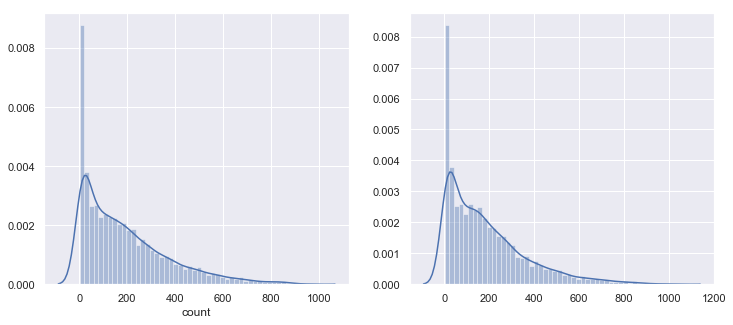

In [116]:
predsTest = gbmodel.predict(X_test)
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)

sns.distplot(y_train, ax=ax1, bins=50)
sns.distplot(np.exp(predsTest), ax=ax2, bins=50)

In [108]:
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [117]:
submission['count'] = np.exp(predsTest)

print(submission.shape)

(6493, 2)


In [118]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.227543
1,2011-01-20 01:00:00,6.296610
2,2011-01-20 02:00:00,4.259238
3,2011-01-20 03:00:00,2.666615
4,2011-01-20 04:00:00,2.295918


In [120]:
submission.to_csv('score_{0:0.5f}_submission.csv'.format(score), index=False)

# reference
- youtube >todaycode오늘코드< 님의 강의를 수강하며 따라 해보았습니다.
- 오늘코드님의 깃헙 주소:  https://github.com/corazzon